Подключение необходимых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plot
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

Загрузка данных из формата, в которм предоставляется набор

In [142]:
data = pd.DataFrame(pd.read_excel("datasets.xlsx"))
# Удаление строк и столбца, которые не яввляются данными
data = data.drop([], axis = 0)
data = data.drop([338, 339], axis = 0) 
data

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
0,Bangladesh,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...","1,664.397","1,711.685","1,721.000","1,754.140","1,780.415",...,"4,423.114","4,673.236","4,938.829","5,226.652","5,565.681","5,815.384","6,058.063","6,411.430","6,786.014",2020.0
1,Bangladesh,Total investment,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,NaN,18.592,19.139,18.149,17.091,...,29.137,29.442,30.240,30.947,31.823,32.214,31.308,31.019,31.683,2022.0
2,Bangladesh,Gross national savings,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,NaN,20.588,20.693,19.689,18.951,...,30.450,30.285,32.112,30.708,30.610,31.138,31.418,30.794,25.568,2022.0
3,Bangladesh,"Inflation, average consumer prices",Index,NaN,Source: Bangladesh Bureau of Statistics Latest...,14.677,16.869,19.172,21.301,23.429,...,183.164,194.896,206.427,217.657,230.243,242.848,256.563,270.822,287.477,2022.0
4,Bangladesh,Volume of imports of goods and services,Percent change,NaN,Source: Central Bank Latest actual data: FY202...,24.832,16.823,4.138,-3.273,0.032,...,12.005,7.432,11.766,7.153,20.605,4.278,-3.395,6.105,20.284,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Vietnam,General government total expenditure,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,NaN,NaN,NaN,NaN,...,"1,123,418.000","1,254,929.500","1,253,677.000","1,355,034.000","1,435,435.000","1,526,893.000","1,709,524.000","1,854,940.000","1,988,288.988",2021.0
334,Vietnam,General government net lending/borrowing,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,NaN,NaN,NaN,NaN,...,"-247,675.525","-258,695.274","-178,429.000","-123,612.700","-71,565.986","-30,577.600","-230,163.190","-291,135.000","-436,814.815",2021.0
335,Vietnam,General government structural balance,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,NaN,NaN,NaN,NaN,...,"-256,447.648","-268,846.949","-191,297.964","-136,757.307","-74,352.540","-13,956.958","-235,476.399","-316,676.622","-452,936.021",2021.0
336,Vietnam,Current account balance,U.S. dollars,Billions,Source: Central Bank Latest actual data: 2021 ...,-0.565,-0.739,-0.616,-0.685,-0.980,...,8.617,-2.039,0.625,-1.651,5.769,12.167,15.060,-7.191,1.130,2021.0


In [143]:
# Очистка числовых столбцов, приведение данных к десятичному типу
data.iloc[:, 5:] = data.iloc[:, 5:].replace('--', np.nan)
data.iloc[:, 5:] = data.iloc[:, 5:].replace(',', '', regex=True).astype(float)

<ipython-input-143-90d3a2a2535e>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



Нормирование и центрирование данных

In [144]:
cols = ['Country', 'Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After']
data_centering = data.drop(cols, axis = 1)
data_centering = data_centering.apply(lambda x: x-x.mean(),  axis = 1)
data_centering[cols] = data[cols]
data_centering = data_centering[cols + [x for x in data_centering.columns if x not in cols]]
data_centering 

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,Estimates Start After,1980,1981,1982,1983,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Bangladesh,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",2020.0,-1429.202186,-1381.914186,-1372.599186,-1339.459186,...,1114.631814,1329.514814,1579.636814,1845.229814,2133.052814,2472.081814,2721.784814,2964.463814,3.317831e+03,3.692415e+03
1,Bangladesh,Total investment,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,2022.0,NaN,-5.361595,-4.814595,-5.804595,...,4.985405,5.183405,5.488405,6.286405,6.993405,7.869405,8.260405,7.354405,7.065405e+00,7.729405e+00
2,Bangladesh,Gross national savings,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,2022.0,NaN,-5.083833,-4.978833,-5.982833,...,5.863167,4.778167,4.613167,6.440167,5.036167,4.938167,5.466167,5.746167,5.122167e+00,-1.038333e-01
3,Bangladesh,"Inflation, average consumer prices",Index,NaN,Source: Bangladesh Bureau of Statistics Latest...,2022.0,-88.884721,-86.692721,-84.389721,-82.260721,...,67.062279,79.602279,91.334279,102.865279,114.095279,126.681279,139.286279,153.001279,1.672603e+02,1.839153e+02
4,Bangladesh,Volume of imports of goods and services,Percent change,NaN,Source: Central Bank Latest actual data: FY202...,2022.0,16.324116,8.315116,-4.369884,-11.780884,...,-4.255884,3.497116,-1.075884,3.258116,-1.354884,12.097116,-4.229884,-11.902884,-2.402884e+00,1.177612e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Vietnam,General government total expenditure,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,2021.0,NaN,NaN,NaN,NaN,...,305730.672760,335025.672760,466537.172760,465284.672760,566641.672760,647042.672760,738500.672760,921131.672760,1.066548e+06,1.199897e+06
334,Vietnam,General government net lending/borrowing,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,2021.0,NaN,NaN,NaN,NaN,...,-159983.721520,-140849.272520,-151869.021520,-71602.747520,-16786.447520,35260.266480,76248.652480,-123336.937520,-1.843087e+05,-3.299886e+05
335,Vietnam,General government structural balance,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,2021.0,NaN,NaN,NaN,NaN,...,-164171.880680,-147761.767680,-160161.068680,-82612.083680,-28071.426680,34333.340320,94728.922320,-126790.518680,-2.079907e+05,-3.442501e+05
336,Vietnam,Current account balance,U.S. dollars,Billions,Source: Central Bank Latest actual data: 2021 ...,2021.0,-0.545395,-0.719395,-0.596395,-0.665395,...,7.763605,8.636605,-2.019395,0.644605,-1.631395,5.788605,12.186605,15.079605,-7.171395e+00,1.149605e+00


In [145]:
scaler = preprocessing.MinMaxScaler()
data_norm = data.drop(['Country', 'Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'], axis = 1)
data_norm.iloc[:] = scaler.fit_transform(data_norm.iloc[:])
data_norm[cols] = data[cols]
data_norm = data_norm[cols + [x for x in data_norm.columns if x not in cols]]
data_norm

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,Estimates Start After,1980,1981,1982,1983,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Bangladesh,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",2020.0,0.223417,0.135917,0.142844,0.113313,...,0.132291,0.117347,0.133951,0.130818,0.133578,0.097255,0.121747,0.249156,0.203928,0.174421
1,Bangladesh,Total investment,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,2022.0,NaN,0.004330,0.005638,0.004404,...,0.130295,0.115370,0.131950,0.128768,0.131573,0.095226,0.119784,0.247575,0.202281,0.172830
2,Bangladesh,Gross national savings,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,2022.0,NaN,0.004485,0.005763,0.004501,...,0.130296,0.115371,0.131950,0.128769,0.131573,0.095226,0.119784,0.247575,0.202281,0.172829
3,Bangladesh,"Inflation, average consumer prices",Index,NaN,Source: Bangladesh Bureau of Statistics Latest...,2022.0,0.005777,0.004196,0.005640,0.004602,...,0.130363,0.115440,0.132021,0.128842,0.131645,0.095299,0.119856,0.247634,0.202343,0.172890
4,Bangladesh,Volume of imports of goods and services,Percent change,NaN,Source: Central Bank Latest actual data: FY202...,2022.0,0.007116,0.004192,0.004428,0.003061,...,0.130283,0.115363,0.131940,0.128760,0.131564,0.095222,0.119775,0.247566,0.202275,0.172827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Vietnam,General government total expenditure,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,2021.0,NaN,NaN,NaN,NaN,...,0.652692,0.620702,0.672671,0.652260,0.654382,0.621493,0.637932,0.696074,0.681032,0.641265
334,Vietnam,General government net lending/borrowing,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,2021.0,NaN,NaN,NaN,NaN,...,0.002888,0.003946,0.020468,0.054248,0.083867,0.068976,0.109396,0.187182,0.127132,0.069909
335,Vietnam,General government structural balance,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,2021.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.016094,0.048874,0.078795,0.067955,0.115037,0.185788,0.120539,0.066111
336,Vietnam,Current account balance,U.S. dollars,Billions,Source: Central Bank Latest actual data: 2021 ...,2021.0,0.003766,0.002827,0.004045,0.003223,...,0.130285,0.115361,0.131936,0.128756,0.131561,0.095217,0.119777,0.247571,0.202272,0.172823


Метод главных компонент

In [146]:
new_df = data_norm
list(new_df["Subject Descriptor"].head(11))

['Gross domestic product per capita, constant prices',
 'Total investment',
 'Gross national savings',
 'Inflation, average consumer prices',
 'Volume of imports of goods and services',
 'Volume of exports of goods and services',
 'Population',
 'General government revenue',
 'General government total expenditure',
 'General government net lending/borrowing',
 'Current account balance']

In [147]:
# Преобразуем данные в новую таблицу для
header = list(new_df["Subject Descriptor"].head(12))
a = new_df.head(12).drop(columns=['Subject Descriptor', 'Country','Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'])
a = pd.DataFrame(a.transpose().reset_index(drop=True))
a.columns = header
a.head(43)

,"Gross domestic product per capita, constant prices",Total investment,Gross national savings,"Inflation, average consumer prices",Volume of imports of goods and services,Volume of exports of goods and services,Population,General government revenue,General government total expenditure,General government net lending/borrowing,Current account balance,Current account balance
0,0.223417,NaN,NaN,0.005777,0.007116,0.005318,0.014347,0.006400,0.009408,0.000833,0.003814,0.003733
1,0.135917,0.004330,0.004485,0.004196,0.004192,0.004751,0.009240,0.004633,0.006409,0.001109,0.002848,0.002747
2,0.142844,0.005638,0.005763,0.005640,0.004428,0.005675,0.010862,0.006062,0.008315,0.001841,0.004040,0.003874
3,0.113313,0.004404,0.004501,0.004602,0.003061,0.003818,0.008670,0.004960,0.006981,0.001244,0.003233,0.003126
4,0.095000,0.003983,0.004079,0.004310,0.003102,0.003012,0.007665,0.004766,0.006367,0.001500,0.003074,0.003002
5,0.022305,0.000792,0.000818,0.000893,0.000598,0.000521,0.001676,0.001053,0.001446,0.000187,0.000572,0.000552
6,0.023705,0.000866,0.000894,0.001003,0.000629,0.000837,0.001821,0.001213,0.001720,0.000134,0.000633,0.000613
7,0.023983,0.000776,0.000806,0.000966,0.000611,0.000894,0.001788,0.001211,0.001772,0.000000,0.000555,0.000540
8,0.027711,0.004148,0.004178,0.004381,0.004126,0.004070,0.005209,0.004667,0.005258,0.003336,0.003917,0.003896
9,0.030008,0.005319,0.005360,0.005600,0.005327,0.005244,0.006444,0.005956,0.006662,0.004384,0.005074,0.005047


In [148]:
# Подсчет количества строк с хотя бы одним пропущенным значением

missing_values = a.isna().sum(axis=1)

num_rows_with_missing_values = (missing_values > 0).sum()

print("Количество строк с пропущенными значениями:", num_rows_with_missing_values)

Количество строк с пропущенными значениями: 1


In [149]:
a = a.dropna()

In [150]:
missing_values = a.isna().sum(axis=1)

num_rows_with_missing_values = (missing_values > 0).sum()

print("Количество строк с пропущенными значениями:", num_rows_with_missing_values)

Количество строк с пропущенными значениями: 0


In [151]:
a.shape[1]

12

In [154]:
# функция реальзующая стандартизацию данных
def standardization(X_train, X_test):
    std_scaler = StandardScaler()
    X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(std_scaler.transform(X_test), columns=X_train.columns)
    return X_train, X_test

In [155]:
# Отделяем целевую переменную
y = a['Population']
X = a.drop(['Population'], axis=1)

X, _  =  standardization(X, X)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train, X_test = standardization(x_train, x_test)


In [156]:
# Функция для определения оптимального числа главных компонент
def optimal_components(X): 
    variance_threshold=0.95
    # Применение PCA
    pca = PCA(n_components= X.shape[1])
    X_pca = pca.fit(X)
    # Кумулятивная сумма объясненной дисперсии
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    # Возвращение оптимального числа главных компонент
    optimal = np.argmax(explained_variance_ratio >= variance_threshold) + 1
    return optimal

In [157]:
# Функция для построения графиков счетов и нагрузок с использованием seaborn
def plot_pca_scores_and_loadings(X, num_components):
    pca = PCA(n_components=num_components)
    scores = pca.fit_transform(X)
    loadings = pca.components_.T
    # График счетов
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=scores[:, 0], y=scores[:, 1], hue=y, palette='viridis')
    plt.axhline(y=0, color='black', linewidth = 1) 
    plt.axvline(x=0, color='black', linewidth = 1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Scores')
    plt.savefig('saved_figure.png')
    plt.show()

    # График нагрузок
    plt.figure(figsize=(10, 6))
    sns.barplot(x=X.columns, y=loadings[:, 0])
    plt.xlabel('Features')
    plt.ylabel('Loadings')
    plt.title('PCA Loadings')
    plt.xticks(rotation=60)
    plt.savefig('saved_figur1.png')
    plt.show()

1


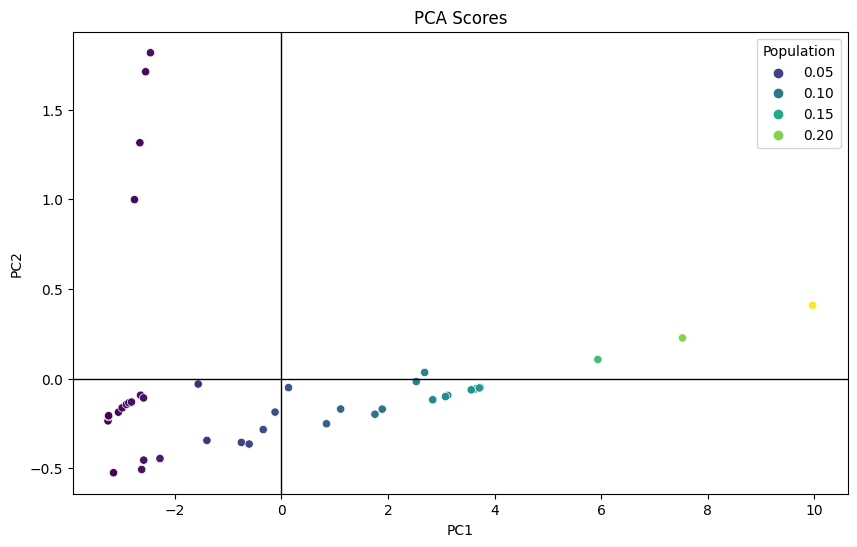

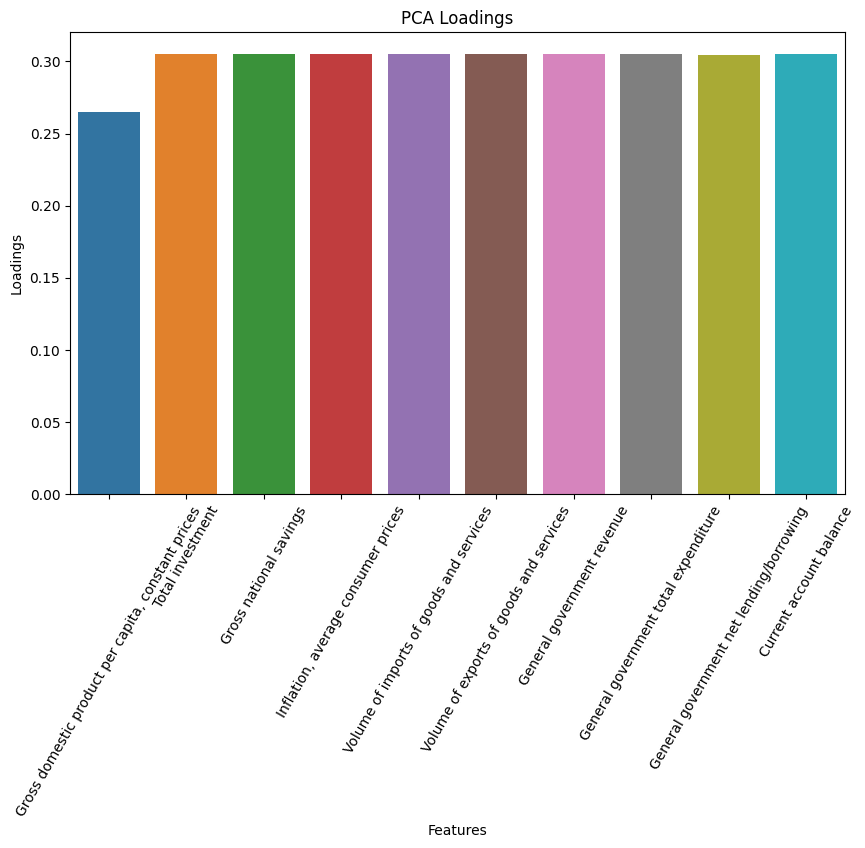

In [158]:
# Построение графиков счетов и нагрузок
n = optimal_components(X)
print(n)
plot_pca_scores_and_loadings(X, 2)

***Выполнение дополнительной части задания.***
В качестве дополнительной работы мы решили выбрать то, что напрямую вытекает из нашего датасета. Так как мы работаем с данными по экономике, то нам бы хотелось бы уметь прогнозировать по ним будущие года. Иными словами это называется анализом временных рядов при помощи машинного обучения.

In [160]:
data.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
0,Bangladesh,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",1664.397,1711.685,1721.000,1754.140,1780.415,...,4423.114,4673.236,4938.829,5226.652,5565.681,5815.384,6058.063,6411.430,6786.014,2020.0
1,Bangladesh,Total investment,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,NaN,18.592,19.139,18.149,17.091,...,29.137,29.442,30.240,30.947,31.823,32.214,31.308,31.019,31.683,2022.0
2,Bangladesh,Gross national savings,Percent of GDP,NaN,Source: National Statistics Office. Bangladesh...,NaN,20.588,20.693,19.689,18.951,...,30.450,30.285,32.112,30.708,30.610,31.138,31.418,30.794,25.568,2022.0
3,Bangladesh,"Inflation, average consumer prices",Index,NaN,Source: Bangladesh Bureau of Statistics Latest...,14.677,16.869,19.172,21.301,23.429,...,183.164,194.896,206.427,217.657,230.243,242.848,256.563,270.822,287.477,2022.0
4,Bangladesh,Volume of imports of goods and services,Percent change,NaN,Source: Central Bank Latest actual data: FY202...,24.832,16.823,4.138,-3.273,0.032,...,12.005,7.432,11.766,7.153,20.605,4.278,-3.395,6.105,20.284,2022.0


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        338 non-null    object 
 1   Subject Descriptor             338 non-null    object 
 2   Units                          338 non-null    object 
 3   Scale                          187 non-null    object 
 4   Country/Series-specific Notes  338 non-null    object 
 5   1980                           158 non-null    float64
 6   1981                           169 non-null    float64
 7   1982                           174 non-null    float64
 8   1983                           177 non-null    float64
 9   1984                           177 non-null    float64
 10  1985                           183 non-null    float64
 11  1986                           188 non-null    float64
 12  1987                           187 non-null    flo

In [162]:
# смотрим пропуски построчно для каждой страны (axis=1)
data.isna().sum(axis=1)

0       0
1       2
2       2
3       1
4       1
       ..
333    18
334    18
335    18
336     0
337     1
Length: 338, dtype: int64

Будем предсказывать Current account balance во Вьетнаме, так как нет пропусков. В остальных случаях пришлось бы их заменять (например, средним по соседям или по всем годам) и терять точность.

In [163]:
data.iloc[336] #  у этой строки нет пропусков

Country                                                                    Vietnam
Subject Descriptor                                         Current account balance
Units                                                                 U.S. dollars
Scale                                                                     Billions
Country/Series-specific Notes    Source: Central Bank Latest actual data: 2021 ...
1980                                                                        -0.565
1981                                                                        -0.739
1982                                                                        -0.616
1983                                                                        -0.685
1984                                                                         -0.98
1985                                                                        -0.943
1986                                                                         -1.48
1987

In [164]:
df = data.iloc[336]
df = pd.DataFrame(df)
df = df.T
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
336,Vietnam,Current account balance,U.S. dollars,Billions,Source: Central Bank Latest actual data: 2021 ...,-0.565,-0.739,-0.616,-0.685,-0.98,...,8.617,-2.039,0.625,-1.651,5.769,12.167,15.06,-7.191,1.13,2021.0


In [165]:
time_series = np.array(df.loc[336, 1980:2022])

In [166]:
#Сначала предскажем те года, для которых мы знаем верный ответ, чтобы суметь понять качество работы модели
from statsmodels.tsa.arima.model import ARIMA

time_series = df.loc[336, 1980:2017].astype(float).values

# создаём модель
model = ARIMA(time_series, order=(1, 0, 0))  # Model parameters (p, d, q)

# обучаем модель 
model_fit = model.fit()

# предсказываем 5 следующих точек
repeate = model_fit.forecast(steps=6)  # Number of steps ahead for forecasting

print(repeate)

[-1.32630132 -1.12027211 -0.98954157 -0.90658987 -0.853955   -0.82055689]


In [167]:
# настоящие значения
true = df.loc[336, 2017:2022].astype(float).values
true

array([-1.651,  5.769, 12.167, 15.06 , -7.191,  1.13 ])

Среднеквадратическое отклонение - один из самых распространённых и известных показателей рассеивания значений относительно истинных (целевых).

In [168]:
#Для сравнения моделей вычислим среднеквадратическое отклонение
from sklearn.metrics import mean_squared_error
mean_squared_error(true, repeate)

86.59281488683017

In [169]:
time_series = np.array(df.loc[336, 1980:2022])

Первая модель, которую мы используем - **ARIMA**. Эта модель смотрит на разность временных порядков, она смотрит производные нескольких порядков на наших точках, а затем двигается на период (одну точку).

In [170]:
#А теперь уже предскажем на пять лет вперёд
from statsmodels.tsa.arima.model import ARIMA

time_series = df.loc[336, 1980:2022].astype(float).values

# создаём модель
model = ARIMA(time_series, order=(1, 0, 0))  # Model parameters (p, d, q)

# обучаем модель 
model_fit = model.fit()

# предсказываем 5 следующих точек
forecast = model_fit.forecast(steps=6)  # Number of steps ahead for forecasting

print(forecast)

[0.52216925 0.23904636 0.10716989 0.04574284 0.01713059 0.00380323]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



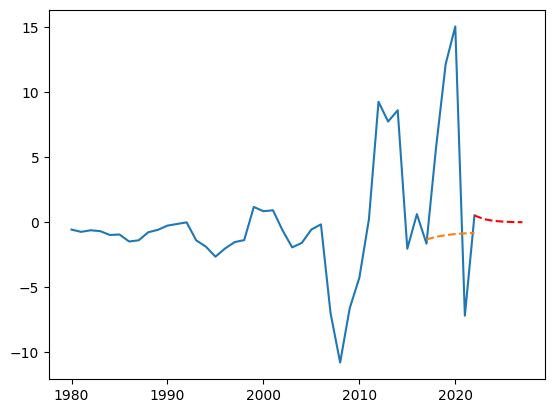

In [171]:
years = []
CaB = []
rep_years = []
rep_CaB = []
for i in range(1980, 2022):
    years.append(i)
    CaB.append(df[i])
for i in range(len(forecast)):
    years.append(2022 + i)
    CaB.append(forecast[i])
    rep_years.append(2017 + i)
    rep_CaB.append(repeate[i])
plt.plot(years[:-5], CaB[:-5])
plt.plot(years[-6:], CaB[-6:], color = 'red', linestyle='--')
plt.plot(rep_years, rep_CaB, linestyle='--')
plt.savefig('saved_figur2.png')

Данных мало, поэтому мы можем с небольшой уверенностью сказать, что синий график является стационарным (нет ярко выроженного тренда), поэтому такое расположение графиков-прдесказаний вполне оправдано.

Вторая модель - **SARIMAX**. Это дополнение модели ARIMA, отличающееся тем, что включает в себя регрессионную составляющую. То есть сравнение параметров между собой.

In [172]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# пробуем другую модель 
model = SARIMAX(time_series, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))

model_fit = model.fit()

# Предсказание на 5 шагов вперед
forecast = model_fit.get_forecast(steps=6)

predicted_values = forecast.predicted_mean

print(predicted_values)

[-0.04195068 -2.3586869  -1.97407366 -2.19906363  0.5215765  -0.15925212]


In [173]:
#Также смотрим среднеквадратическое отклонение
from sklearn.metrics import mean_squared_error
mean_squared_error(true, predicted_values)

104.60659719287527

Мы видим, что у второй модели для анализа временных рядов среднеквадратическое отклонение больше, а значит точность хуже.
Но как таковое, мы не можем говорить о том, что одна модель лучше, а другая хуже, так как понятно, что данных для проведения такого анализа мало и поэтому точность существенно падает. К тому же ряд является стационарным (мы принимаем это без проверки производных), поэтому модели не могут опираться на тренд, но стоит также учесть, что разработчики первой модели утверждают, что она хорошо справляется со стационарными рядами, поэтому первоочередная проблема - количество данных.